In [29]:
import pickle
import glob
import os

from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/ipynb'

In [3]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

## Comparing All Dictionaries

In [4]:
cd /Users/williamharrigan/Desktop/

/Users/williamharrigan/Desktop


In [5]:
import pickle
import glob
from collections import defaultdict
import matplotlib.pyplot as plt


In [6]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

In [20]:
pickle_files = glob.glob('/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/ENA/pkl_files_2/*.pkl')

dictionaries = {}

for file_path in pickle_files:
    name = os.path.splitext(os.path.basename(file_path))[0] 
    # name = file_path.split('/')[1].rstrip('.pkl')
    # print(name)
    dictionaries[name] = load_pickle(file_path) 

In [22]:
pickle_files = glob.glob('/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/POL_RNR/90_POL_RNR/90_seqs_pkl/*.pkl')

for file_path in pickle_files:
    name = os.path.splitext(os.path.basename(file_path))[0]
    # name = file_path.split('/')[1].rstrip('.pkl') 
    dictionaries[name] = load_pickle(file_path)  

In [40]:
pickle_files = glob.glob('/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/POL_RNR/POL_F_RNR_ILP_pkl/*.pkl')

for file_path in pickle_files:
    name = os.path.splitext(os.path.basename(file_path))[0]
    # name = file_path.split('/')[1].rstrip('.pkl') 
    dictionaries[name] = load_pickle(file_path) 

In [41]:
dictionaries.keys()

dict_keys(['65471___111635_contacts', '61573__82342_sequences_in_predictions', '109054__133666_matches_dict', '65471___111635_predictions', '158876___152596_sequences_in_predictions', 'pol_rnr_sequences_in_predictions', '994___145569_contacts', '994___145569_predictions', '65471___111635_sequences_in_predictions', '4879___108646_matches_dict', '61573__82342_predictions', '4879___108646_sequences_in_predictions', '994___145569_sequences_in_predictions', '4879___108646_predictions', '158876___152596_contacts', '61573__82342_matches_dict', '109054__133666_contacts', '4879___108646_contacts', '61573__82342_contacts', 'pol_rnr_predictions', '158876___152596_predictions', '109054__133666_predictions', '158876___152596_matches_dict', '994___145569_matches_dict', 'pol_rnr_matches_dict', 'pol_rnr_contacts', '109054__133666_sequences_in_predictions', '65471___111635_matches_dict', 'POL_F_RNR_ILP_sequences_in_predictions', 'POL_F_RNR_ILP_predictions', 'POL_F_RNR_ILP_matches_dict', 'POL_F_RNR_ILP_

In [42]:
keys_ = []

for i in dictionaries.keys():
    if 'sequences_in_predictions' in i:
        keys_.append(i)
print(keys_)

['61573__82342_sequences_in_predictions', '158876___152596_sequences_in_predictions', 'pol_rnr_sequences_in_predictions', '65471___111635_sequences_in_predictions', '4879___108646_sequences_in_predictions', '994___145569_sequences_in_predictions', '109054__133666_sequences_in_predictions', 'POL_F_RNR_ILP_sequences_in_predictions']


In [43]:

prediction_dict = defaultdict(dict)

for i in keys_:
    print(i)
    sorted_dict = {k: len(v) for k, v in sorted(dictionaries[i].items(), key=lambda item: len(item[1]), reverse=True)}
    prediction_dict[i] = sorted_dict


61573__82342_sequences_in_predictions
158876___152596_sequences_in_predictions
pol_rnr_sequences_in_predictions
65471___111635_sequences_in_predictions
4879___108646_sequences_in_predictions
994___145569_sequences_in_predictions
109054__133666_sequences_in_predictions
POL_F_RNR_ILP_sequences_in_predictions


In [26]:
# dictionaries['pol_rnr_predictions']

In [44]:
barplot_data = {}

for i in prediction_dict.keys():
    print(i)
    vals = []
    for keys, values in prediction_dict[i].items():
        # print(keys, values)
        vals.append(values)
    barplot_data[i] = vals

61573__82342_sequences_in_predictions
158876___152596_sequences_in_predictions
pol_rnr_sequences_in_predictions
65471___111635_sequences_in_predictions
4879___108646_sequences_in_predictions
994___145569_sequences_in_predictions
109054__133666_sequences_in_predictions
POL_F_RNR_ILP_sequences_in_predictions


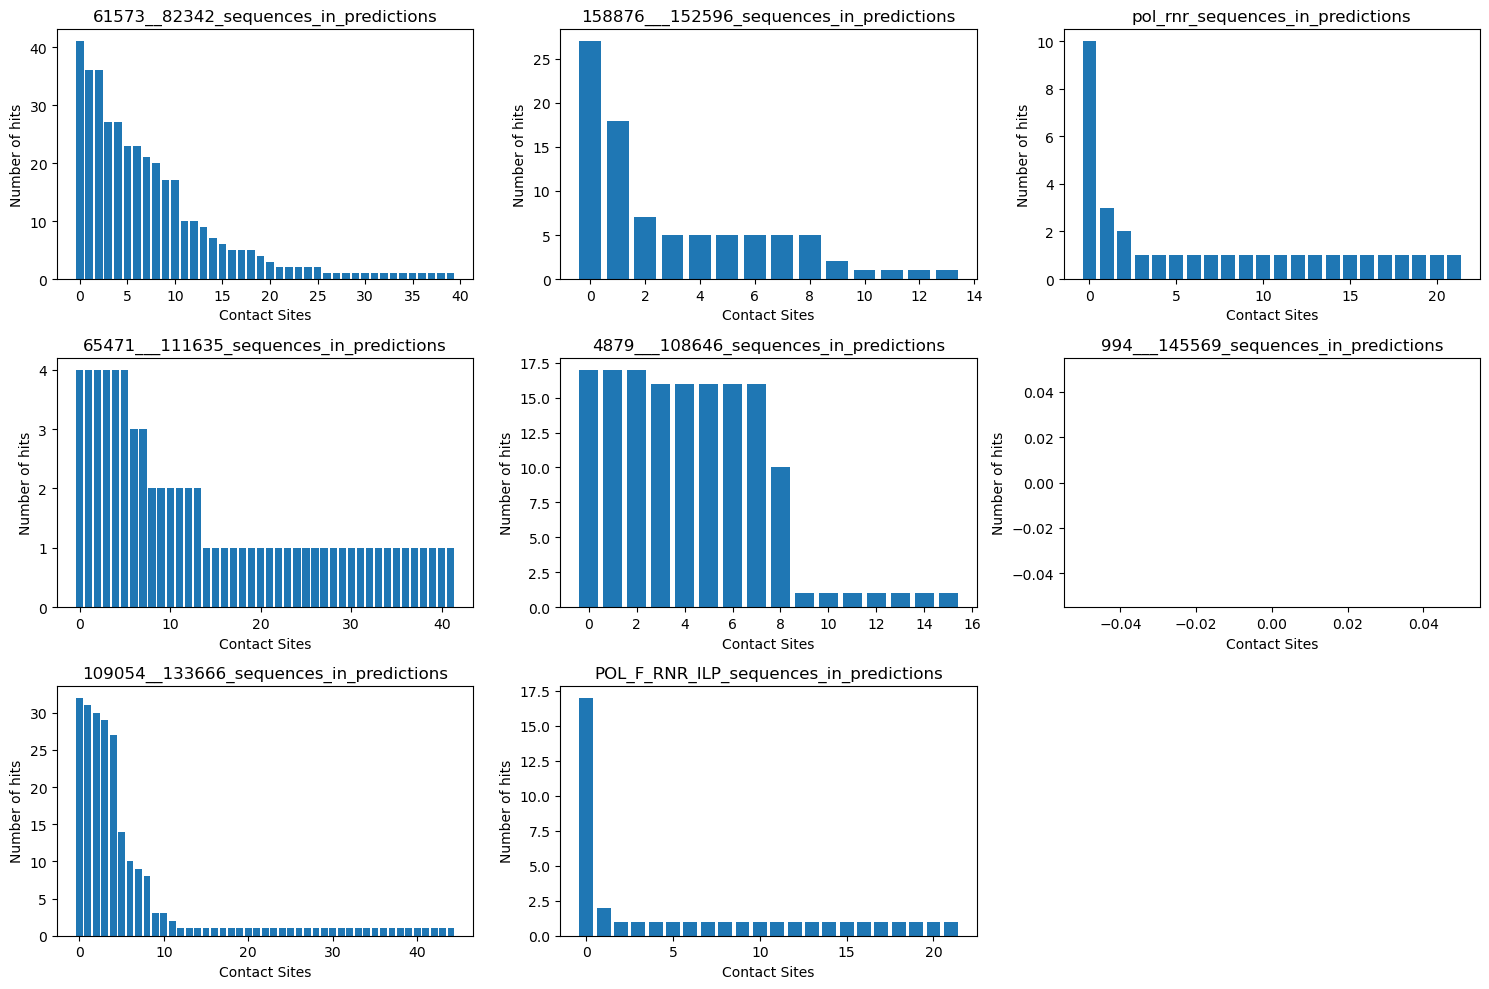

In [47]:
nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot data
for idx, (key, values) in enumerate(barplot_data.items()):
    ax = axes[idx]
    ax.bar(range(len(values)), values)
    ax.set_title(key)
    ax.set_xlabel('Contact Sites')  # Custom label, modify as needed
    ax.set_ylabel('Number of hits')  # Custom label, modify as needed
    # ax.set_ylim(0, 45)  # Set the y-axis limits for all plots

# Hide any unused subplots if there are fewer than 9 keys
for i in range(len(barplot_data), nrows * ncols):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('barplot_grid.png')
plt.show()



## Analyze Dictionaries

In [35]:
for k,v in dictionaries['61573__82342_contacts'].items():
    print(k)
    print(v)
    print(len(v))
    print()

ENA_MN163280_MN163280_1_21922_21260_41___ENA_MN163280_MN163280_1_56539_59328_101
{(218, 276), (220, 274), (219, 277), (220, 276)}
4

ENA_MT004791_MT004791_1_20882_20226_40___ENA_MT004791_MT004791_1_61049_63838_112
{(218, 223), (216, 274), (218, 222), (218, 274), (217, 275), (218, 221), (218, 272), (218, 224)}
8

ENA_MF431736_MF431736_1_22316_21660_45___ENA_MF431736_MF431736_1_64160_66949_121
{(218, 223), (216, 274), (218, 222), (218, 274), (217, 275), (218, 221), (218, 272), (218, 224)}
8

ENA_MK770410_MK770410_1_94013_94669_131___ENA_MK770410_MK770410_1_50997_48208_53
{(218, 223), (216, 274), (218, 222), (218, 274), (218, 221), (218, 272), (218, 224)}
7

ENA_MW006481_MW006481_1_21971_21315_41___ENA_MW006481_MW006481_1_60260_63049_107
{(218, 223), (216, 274), (218, 222), (218, 274), (218, 221), (218, 272), (218, 224)}
7

ENA_MK770119_MK770119_1_84868_85530_119___ENA_MK770119_MK770119_1_47908_45122_47
{(220, 226), (220, 225), (219, 223), (219, 226), (220, 276), (219, 225), (220, 224), (

In [33]:
for k,v in dictionaries['pol_rnr_contacts'].items():
    print(k)
    print(v)
    print(len(v))
    print()

RI_1_NODE_170_length_41164_cov_3.968541_588
{(554, 592), (554, 594), (554, 591), (587, 591), (579, 591), (553, 591)}
6

RI_1_NODE_487_length_28173_cov_24.114419_507
{(506, 509)}
1

RI_1_NODE_693_length_23722_cov_20.624031_420
{(417, 425), (418, 425), (419, 425), (415, 422), (415, 423), (415, 425), (417, 427), (415, 428), (418, 424), (415, 421), (415, 427), (415, 424), (417, 426), (418, 426), (416, 425), (419, 426)}
16

RI_1_NODE_1055_length_18808_cov_8.469889_420
set()
0

RI_1_NODE_1664_length_14287_cov_7.631356_422
{(421, 428), (420, 426), (421, 427), (418, 428), (419, 428), (421, 424), (418, 427), (419, 427), (420, 427), (421, 426), (420, 424), (421, 429), (419, 429), (421, 425), (419, 426)}
15

RI_1_NODE_2241_length_11982_cov_3.255251_578
{(577, 580)}
1

RI_1_NODE_3265_length_9595_cov_13.743663_475
{(474, 476), (474, 477)}
2

RI_2_NODE_226_length_38332_cov_5.973695_423
{(419, 439), (422, 439), (420, 439)}
3

RI_2_NODE_239_length_37680_cov_6.687056_555
{(485, 616)}
1

RI_2_NODE_340_l

In [46]:
for k,v in dictionaries['POL_F_RNR_ILP_contacts'].items():
    print(k)
    print(v)
    print(len(v))
    print()

RI_1_NODE_515_length_27399_cov_6.485773_680
set()
0

RI_3_NODE_748_length_21634_cov_7.443065_420
{(417, 425), (418, 425), (419, 425), (415, 422), (415, 423), (415, 425), (417, 427), (415, 428), (418, 424), (415, 421), (415, 427), (415, 424), (417, 426), (418, 426), (416, 425), (419, 426)}
16

RI_4_NODE_1_length_118172_cov_19.628997_750
{(737, 751)}
1

RI_2_NODE_226_length_38332_cov_5.973695_423
{(419, 439), (422, 439), (420, 439)}
3

RI_3_NODE_904_length_19602_cov_23.150655_670
set()
0

RI_4_NODE_623_length_23496_cov_43.684882_680
{(679, 682)}
1

RI_9_NODE_11_length_111434_cov_8.868068_519
{(518, 523), (411, 560)}
2

RI_2_NODE_2200_length_12209_cov_3.704023_683
set()
0

RI_8_NODE_622_length_35102_cov_14.389221_681
set()
0

RI_9_NODE_687_length_22603_cov_35.077905_680
{(679, 682)}
1

RI_8_NODE_37_length_105828_cov_9.950644_505
{(403, 557), (501, 506), (502, 506), (503, 506), (500, 506), (500, 507), (501, 507), (502, 507), (503, 507), (403, 561)}
10

RI_8_NODE_506_length_37872_cov_13.232

## Run Contact Prediction Locally

In [53]:
import sys 
sys.path.append('/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/py/')
from fine_tune_contacts_matches_dict_2 import *

In [54]:
fasta_file = f'/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/POL_RNR/90_POL_RNR/90_combined.fasta'
embed_dir = f'/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/POL_RNR/90_POL_RNR/90_embeds/'

family = 'pol_rnr'

In [74]:
# ena_fasta_file = f'/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/ENA/ena_embeds/158876___152596.fasta'
# ena_embed_dir = f'/Users/williamharrigan/Desktop/UH/Year_2/Research/match_cont_preds_to_seqs/ENA/ena_embeds/'

# family = 'ena'

In [70]:
def contact_prediction(seq_ids, sequence_dictionary, threshold, embed_dir):
    contact_predictions = {}
    for seq_id in sequence_dictionary.keys():
        try:
            split = int(seq_id.split('_')[-1])
            seq_embedding = torch.load(f"{embed_dir}combined_{seq_ids.index(seq_id)}_full_attentions.pt")
            predictions = seq_embedding.sigmoid()
            high_values = [(i, j, value.item()) for i, row in enumerate(predictions[0]) for j, value in enumerate(row) if value.item() > threshold and i < split and j > split]
            contact_predictions[seq_id] = {(i[0], i[1]) for i in high_values}
        except:
            pass
    return contact_predictions

In [71]:
sequence_dict = dict(list(get_seq_dict(fasta_file).items()))
seq_ids = list(sequence_dict.keys())
ref_seq_id = get_ref_seq(seq_ids, sequence_dict, embed_dir)

In [73]:
# ena_sequence_dict = dict(list(get_seq_dict(ena_fasta_file).items()))
# ena_seq_ids = list(sequence_dict.keys())
# ena_ref_seq_id = get_ref_seq(ena_seq_ids, ena_sequence_dict, ena_embed_dir)

In [66]:
(seq_ids)

['RI_1_NODE_170_length_41164_cov_3.968541_588',
 'RI_1_NODE_487_length_28173_cov_24.114419_507',
 'RI_1_NODE_693_length_23722_cov_20.624031_420',
 'RI_1_NODE_1055_length_18808_cov_8.469889_420',
 'RI_1_NODE_1664_length_14287_cov_7.631356_422',
 'RI_1_NODE_2241_length_11982_cov_3.255251_578',
 'RI_1_NODE_3265_length_9595_cov_13.743663_475',
 'RI_2_NODE_226_length_38332_cov_5.973695_423',
 'RI_2_NODE_239_length_37680_cov_6.687056_555',
 'RI_2_NODE_340_length_33288_cov_10.186544_519',
 'RI_2_NODE_1047_length_18797_cov_6.878682_515',
 'RI_2_NODE_2200_length_12209_cov_3.704023_683',
 'RI_2_NODE_3685_length_9006_cov_1.493524_394',
 'RI_2_NODE_7472_length_5868_cov_2.070197_450',
 'RI_2_NODE_7679_length_5756_cov_7.893587_420',
 'RI_3_NODE_43_length_58327_cov_23.999674_546',
 'RI_3_NODE_146_length_40113_cov_6.659856_603',
 'RI_3_NODE_178_length_37957_cov_56.178668_509',
 'RI_3_NODE_392_length_29415_cov_16.577882_569',
 'RI_3_NODE_466_length_27483_cov_2.202405_586',
 'RI_3_NODE_748_length_21634_

In [79]:
seq_id = 'RI_1_NODE_693_length_23722_cov_20.624031_420'
threshold = 0.95

print(seq_id)
split = int(seq_id.split('_')[-1])
seq_embedding = torch.load(f"{embed_dir}combined_{seq_ids.index(seq_id)}_full_attentions.pt")
predictions = seq_embedding.sigmoid()
high_values = [(i, j, value.item()) for i, row in enumerate(predictions[0]) for j, value in enumerate(row) if value.item() > threshold and i < split and j > split]
print(len(high_values))
print()

RI_1_NODE_693_length_23722_cov_20.624031_420
16



In [80]:
predictions

tensor([[[0.0129, 0.8066, 0.4766,  ..., 0.5189, 0.4935, 0.5023],
         [0.8066, 0.8418, 0.6172,  ..., 0.5009, 0.4980, 0.4980],
         [0.4766, 0.6172, 0.9550,  ..., 0.4896, 0.5000, 0.4963],
         ...,
         [0.5189, 0.5009, 0.4896,  ..., 0.9964, 0.9907, 0.8956],
         [0.4935, 0.4980, 0.5000,  ..., 0.9907, 0.9137, 0.9993],
         [0.5023, 0.4980, 0.4963,  ..., 0.8956, 0.9993, 0.9273]]],
       grad_fn=<SigmoidBackward0>)

In [81]:
high_values

[(415, 421, 0.9625358581542969),
 (415, 422, 0.986255407333374),
 (415, 423, 0.9583709239959717),
 (415, 424, 0.9592592716217041),
 (415, 425, 0.9922506213188171),
 (415, 427, 0.9800149202346802),
 (415, 428, 0.9735870361328125),
 (416, 425, 0.9626747369766235),
 (417, 425, 0.9782516956329346),
 (417, 426, 0.9578750729560852),
 (417, 427, 0.9555261731147766),
 (418, 424, 0.9500489234924316),
 (418, 425, 0.997646152973175),
 (418, 426, 0.9899112582206726),
 (419, 425, 0.9779669046401978),
 (419, 426, 0.9691386222839355)]

In [59]:
# seq_id = 'RI_8_NODE_10004_length_8060_cov_12.534350_420'
threshold = 0.95

for seq_id in seq_ids:
    print(seq_id)
    split = int(seq_id.split('_')[-1])
    seq_embedding = torch.load(f"{embed_dir}combined_{seq_ids.index(seq_id)}_full_attentions.pt")
    predictions = seq_embedding.sigmoid()
    high_values = [(i, j, value.item()) for i, row in enumerate(predictions[0]) for j, value in enumerate(row) if value.item() > threshold and i < split and j > split]
    print(len(high_values))
    print()

RI_1_NODE_170_length_41164_cov_3.968541_588
6

RI_1_NODE_487_length_28173_cov_24.114419_507
1

RI_1_NODE_693_length_23722_cov_20.624031_420
16

RI_1_NODE_1055_length_18808_cov_8.469889_420
0

RI_1_NODE_1664_length_14287_cov_7.631356_422
15

RI_1_NODE_2241_length_11982_cov_3.255251_578
1

RI_1_NODE_3265_length_9595_cov_13.743663_475
2

RI_2_NODE_226_length_38332_cov_5.973695_423
3

RI_2_NODE_239_length_37680_cov_6.687056_555
1

RI_2_NODE_340_length_33288_cov_10.186544_519
1

RI_2_NODE_1047_length_18797_cov_6.878682_515
2

RI_2_NODE_2200_length_12209_cov_3.704023_683
0

RI_2_NODE_3685_length_9006_cov_1.493524_394
2

RI_2_NODE_7472_length_5868_cov_2.070197_450
0

RI_2_NODE_7679_length_5756_cov_7.893587_420
2

RI_3_NODE_43_length_58327_cov_23.999674_546
1

RI_3_NODE_146_length_40113_cov_6.659856_603
3

RI_3_NODE_178_length_37957_cov_56.178668_509
2

RI_3_NODE_392_length_29415_cov_16.577882_569
1

RI_3_NODE_466_length_27483_cov_2.202405_586
3

RI_3_NODE_748_length_21634_cov_7.443065_420
16
